In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random

# Módulo 2 - Clase 1

## Población y muestra: ejemplos

1. Si el conjunto de datos de interés está constituido por **todos los estudiantes** de licenciatura en el Tecnológico de Tlalnepantla, 
    - cada uno de los estudiantes será un **individuo** estadístico
    - el conjunto de todos los estudiantes será la **población**. 
    - Una **muestra** podría ser el conjunto de todos los estudiantes del cuarto semestre de la licenciatura en administración.

2. La producción de autos de una armadora ubicada en Morelos. En este ejemplo, 
    - la **población** son todos los autos ensamblados en esa planta.
    - cada uno de los autos ensamblados es un **individuos** estadístico
    - una **muestra** se puede proponer como los autos subcompactos fabricados en mayo.

3. El estudio de ciertos experimentos químicos. En este caso, 
    - cada uno de los experimentos será un **individuo** estadístico y 
    - el conjunto de todos los posibles experimentos en esas condiciones será la **población** 
    - una **muestra** podría ser un conjunto de resultados experimentales en ciertas condiciones.  

4. El conjunto de mediciones, en toneladas, de la carga máxima soportada por los cables de acero producidos por la compañía CM. En este caso, los individuos se refieren a los cables producidos por esta empresa durante un periodo determinado.

## Tipos de datos

Ver M1 - clase 02

Cuando trabajamos con estadísticas, es importante reconocer los diferentes tipos de datos: 

- **Cuantitativos**:
    - discretos
    - continuos

- **Cualitativos**
    - **categóricos**
    - **ordinales**

## tipos de datos: ejemplos

1. Si los individuos son personas, entonces el sexo, el estado civil, el número de hermanos o su estatura son caracteres.
2. Si los individuos son computadoras, entonces un carácter podría ser la rapidez del procesador y la capacidad del disco duro, entre otras.
3. Si el individuo es una reacción química, entonces el tiempo de la reacción, la cantidad de producto obtenido o si éste es ácido o básico son posibles caracteres.

### Cualitativos categóricos
1. El **sector económico** se clasifica en: primario, industrial y de servicios.
2. **Profesión**: ingeniero, médico, matemático, abogado, etcétera.
3. **Colores de un objeto**: blanco, negro, rojo, entre otros.

### Cualitativos ordinales
1. Diferentes **niveles de satisfacción** de una persona sobre un producto: muy satisfecho, medio satisfecho y no muy satisfecho.
2. **Niveles de estudio** de un candidato a ocupar un puesto en la empresa: pasante, licenciado, maestría, doctorado.
3. **Clases sociales** respecto a su poder adquisitivo: baja, media y alta.

![Tipos de datos](img/tiposDatos.png)

In [3]:
emisiones = pd.read_csv('../src/Emisiones_CO2.csv', sep='|', decimal=',', thousands='.', encoding='Latin-1')

In [4]:
emisiones.dropna(inplace=True)

In [5]:
emisiones.head()

,Código de país,Nombre del país,Región,Año,CO2 (kt),CO2 per cápita (toneladas métricas)
26,ABW,Aruba,América Latina y Caribe,1986,179.683,2.868319
27,ABW,Aruba,América Latina y Caribe,1987,447.374,7.234964
28,ABW,Aruba,América Latina y Caribe,1988,612.389,10.026508
29,ABW,Aruba,América Latina y Caribe,1989,649.059,10.634733
30,ABW,Aruba,América Latina y Caribe,1990,1840.830,29.620165


## Distribución de frecuencias

### Ejemplo 1

In [6]:
# Datos de autos vendidos
autos_vendidos = {
    "Marca": ['Audi', 'BMW', 'Mercedes'],
    "Cantidad": [124, 98, 113]
}

autos_df = pd.DataFrame(autos_vendidos)

In [7]:
autos_df

,Marca,Cantidad
0,Audi,124
1,BMW,98
2,Mercedes,113


In [8]:
total_vendidos = autos_df['Cantidad'].sum()

print(total_vendidos)

335


In [9]:
def frecuencia_relativa(datos:list):
    total = sum(datos)
    return datos / total

In [10]:
frecuencia_relativa(autos_df['Cantidad'])

0    0.370149
1    0.292537
2    0.337313
Name: Cantidad, dtype: float64

In [11]:
autos_df['Frecuencia relativa'] = frecuencia_relativa(autos_df['Cantidad'])

In [12]:
autos_df

,Marca,Cantidad,Frecuencia relativa
0,Audi,124,0.370149
1,BMW,98,0.292537
2,Mercedes,113,0.337313


Text(0.5, 1.0, 'Cantidad de autos vendidos por marca')

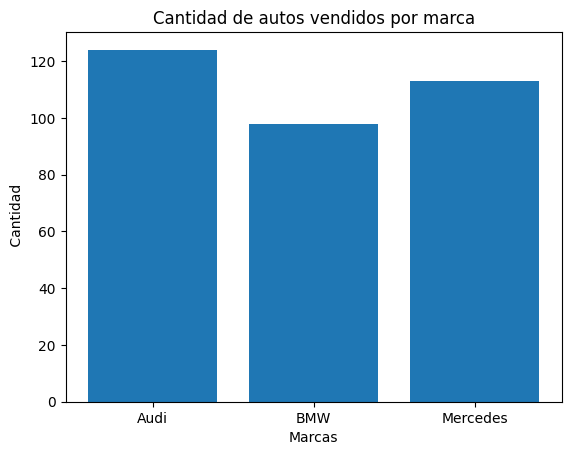

In [13]:
plt.bar(autos_df['Marca'], autos_df['Cantidad'])

plt.xlabel('Marcas')
plt.ylabel(' Cantidad')
plt.title('Cantidad de autos vendidos por marca')

### Ejemplo 2

In [14]:
valores = ['M', 'R', 'B', 'MB', 'E']

In [15]:
calificaciones = [random.choice(valores) for i in range(75)]

In [16]:
conteo = [calificaciones.count(i) for i in valores]

print(conteo)
print(valores)

[14, 21, 11, 11, 18]
['M', 'R', 'B', 'MB', 'E']


In [17]:
conteo_dict = {
    "Calificación": valores,
    "Cantidad": conteo
}

In [18]:
conteo_df = pd.DataFrame(conteo_dict)
conteo_df

,Calificación,Cantidad
0,M,14
1,R,21
2,B,11
3,MB,11
4,E,18


In [19]:
def frecuencia_abs_acumulada(datos):
    return datos.cumsum()

In [20]:
frecuencia_abs_acumulada(conteo_df['Cantidad'])

0    14
1    35
2    46
3    57
4    75
Name: Cantidad, dtype: int64

In [21]:
frecuencia_relativa(conteo_df['Cantidad'])

0    0.186667
1    0.280000
2    0.146667
3    0.146667
4    0.240000
Name: Cantidad, dtype: float64

In [22]:
def frecuencia_relativa_acumulada(datos):
    return

## Histograma

In [23]:
data = [1, 2, 2, 3, 5, 6, 7, 8, 8, 9, 9]

In [24]:
frecuencias, extremos = np.histogram(data, bins=5)
print(frecuencias, extremos)

[3 1 1 2 4] [1.  2.6 4.2 5.8 7.4 9. ]


(array([3., 1., 1., 2., 4.]),
 array([1. , 2.6, 4.2, 5.8, 7.4, 9. ]),
 <BarContainer object of 5 artists>)

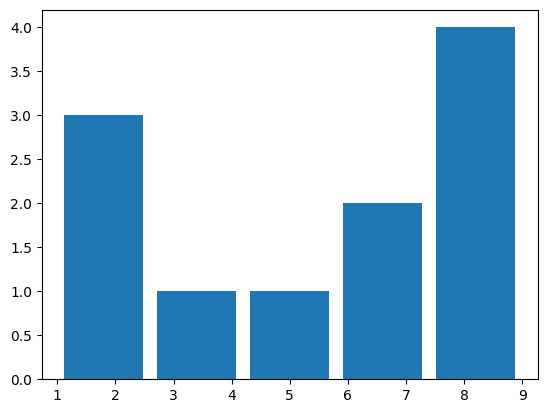

In [25]:
plt.hist(x=data, bins=5, rwidth=0.85)

In [26]:
# Calificaciones de 15 alumnos de un curso
calificaciones_alumnos = [90, 94, 53, 68, 79, 84, 87, 72, 70, 69, 65, 89, 85, 83, 72]

## Medidas de tendencia central

### Media aritmética

**Media aritmética de la población**

$$\mu = \sum_{i} \frac{x_{i}}{N}$$

**Media aritmética de la muestra**

$$\bar{x} = \sum_{i} \frac{x_{i}}{n}$$

In [27]:
def media(datos):
    return sum(datos) / len(datos)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [28]:
media(calificaciones_alumnos)

77.33333333333333

In [29]:
np.mean(calificaciones_alumnos)

77.33333333333333

In [30]:
emisiones.head()

,Código de país,Nombre del país,Región,Año,CO2 (kt),CO2 per cápita (toneladas métricas)
26,ABW,Aruba,América Latina y Caribe,1986,179.683,2.868319
27,ABW,Aruba,América Latina y Caribe,1987,447.374,7.234964
28,ABW,Aruba,América Latina y Caribe,1988,612.389,10.026508
29,ABW,Aruba,América Latina y Caribe,1989,649.059,10.634733
30,ABW,Aruba,América Latina y Caribe,1990,1840.830,29.620165


In [31]:
media(emisiones['CO2 per cápita (toneladas métricas)'])

4.3408217041042105

In [32]:
np.mean(emisiones['CO2 per cápita (toneladas métricas)'])

4.340821704104219

### Promedio ponderado

$$\bar{x}_w = \frac{\sum_{i=1}^{n} w_{i}x_{i}}{\sum_{i=1}^{n} w_{i}}$$

In [33]:
emisiones_2 = pd.read_csv('datos_y_pesos.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datos_y_pesos.csv'

In [ ]:
emisiones_2.head()

,Unnamed: 0,CO2 per cápita (toneladas métricas),intervalos,frecuencias
0,26,2.868319,"(-0.00042, 19.969]",8744.0
1,27,7.234964,"(-0.00042, 19.969]",8744.0
2,28,10.026508,"(-0.00042, 19.969]",8744.0
3,29,10.634733,"(-0.00042, 19.969]",8744.0
4,30,29.620165,"(19.969, 39.937]",216.0


In [ ]:
emisiones_2['frecuencias'].unique()

array([8.744e+03, 2.160e+02, 7.000e+00, 2.600e+01, 3.600e+01])

In [ ]:
def promedio_ponderado(datos, pesos):
    numerador = sum([datos[i] * pesos[i] for i in range(len(datos))])
    denominador = sum(pesos)
    
    return numerador / denominador

In [ ]:
datos = emisiones_2['CO2 per cápita (toneladas métricas)'].to_list()
pesos = emisiones_2['frecuencias'].to_list()

In [ ]:
promedio_ponderado(datos, pesos)

3.3347795067768233

### Media geométrica

$$MG = (\prod_{i=1}^{n} x_{i})^{\frac{1}{n}} = \sqrt[n]{x_{1}x_{2}...x_{n}}$$

In [ ]:
def media_geométrica(datos):
    return

## La Mediana

$$
 mediana = 
  \begin{cases} 
   \frac{x_{[n+1]}}{2} & \text{si } n \text{ es impar}\\
   \frac{x_{[x/2]} + x_{[x/2] + 1}}{2}       & \text{si } n \text{ es par}
  \end{cases}
$$

In [ ]:
data_1 = [1, 2, 2, 3, 5, 6, 7, 8, 8, 9, 9] # cantidad impar de datos


data_2 = [1, 2, 2, 3, 5, 6, 7, 8, 8, 9] # cantidad par de datos

In [ ]:
np.median(data_1)

6.0

In [ ]:
np.median(data_2)

5.5

In [ ]:
def mediana(datos):
    datos_ordenados = sorted(datos)
    if len(datos_ordenados) % 2 == 1:
        return (len(datos_ordenados) + 1)/2
    else:
        posicion = len(datos_ordenados)/2
        return (datos_ordenados[int(posicion)-1] + datos_ordenados[int(posicion)])/2

In [ ]:
mediana(data_1)

6.0

In [ ]:
mediana(data_2)

5.5

## La Moda

In [ ]:
conteo_datos = [data_2.count(i) for i in data_1]

print(data_2)
print(conteo_datos)

[1, 2, 2, 3, 5, 6, 7, 8, 8, 9]
[1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1]


In [ ]:
maximo = max(conteo_datos)

print(maximo)

2


In [ ]:
set([i for i in data_2 if (data_2.count(i) == maximo)])

{2, 8}

In [ ]:
stats.mode(data_1, keepdims=1)

ModeResult(mode=array([2]), count=array([2]))

## La dispersión

### El Rango

In [ ]:
min(data_1)

1

In [ ]:
max(data_1)

9

In [ ]:
rango = max(data_1) - min(data_1)

print(rango)

8


### La Varianza

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_{i} - \mu)^2 $$

In [ ]:
data_1 # N = 11

[1, 2, 2, 3, 5, 6, 7, 8, 8, 9, 9]

In [ ]:
def varianza(datos):
    media = np.mean(datos)
    diferencias = [(i - media)**2 for i in datos]
    suma = sum(diferencias)
    return suma/len(datos)

varianza(data_1)

8.247933884297522

### La Desviación Estándar

$$\sigma = \sqrt{\sigma^2} = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_{i} - \mu)^2 }$$

In [ ]:
np.std(data_1)

2.87192163616933

In [ ]:
def desviacion_estandar(datos):
    var = varianza(datos)
    return np.sqrt(var)

In [ ]:
desviacion_estandar(data_1)

2.87192163616933

### Coeficiente de variación

$$CV = \frac{\sigma}{\mu} \times 100$$

In [ ]:
np.std(data_1) / np.mean(data_1)

0.5265189666310439